# Задание на лабораторную работу №2. Pandas и основы python
## Общее задание
1. Сгенерировать с использованием библиотеки pandas csv файл, содержащий 3 столбца: $x_1$, $x_2$, $y$ (> 400 строк, генерация с использованием функции linspace). Вид функции определяется вариантом (диапазон выбирается студентом).
2. Открыть файл с использованием библиотеки pandas и построить графики: $y(x_1)$ ($x_2$ - константа), $y(x_2)$  ($x_1$ - константа). Графики необходимо построить с использованием matplotlib (для функции y отобразить точки на графике).
3. Вывести для каждого столбца $(x_1, x_2, y)$: среднее, минимальное и максимальное значения.
4. Сохранить в новый csv файл те строки, для которых выполняется условие: $x_1$ меньше среднее $x_1$ или $x_2$ меньше среднее $x_2$
5. С использованием mplot3D построить 3D график функции $y(x_1, x_2)$ в отдельном окне.

## Варианты
1. $y = sin(x_1 + x_2)$
2. $y = cos(x_1 + x_2)$
3. $y = tan(x_1 + x_2) * sin(x_1)$
4. $y = 2 * x_1^2 + 3x_2^2$
5. $y = 5 * log(x_1) * log(2 * x_2)$
6. $y = 5 * log(x_1) * x_2^2$
7. $y = cos(x_1) * x_2^3$
8. $y = \frac{3}{(2 + e^{-2x})}$
9. $y = cos(x_1 + x_2) * x_2 ^ 2$
10. $y = \frac{x_2}{(1 + e^{-x_1})}$
11. $y = \frac{3 * x_1}{(1 - e^{-x_2})}$
12. $y = 0.01 * tan(x_1) * x_2^2$
13. $y = x_1^6 + x_2^2 + x_1^3 + 4x_2 + 5$
14. $y = cos(x_1) * x_2^3$
15. $y = tan(x_1) * ctg(x_2)$
16. $y = \frac{sin(x_1)}{(1 + e^{-2x_2})}$
17. $y = \frac{cos(x_1)}{(1 + e^{-2x_1})}$
18. $y = \frac{tan(x_1)}{(3 + e^{-2x_2})}$
19. $y = \frac{ctg(x_1)}{(2 + e^{-2x_2})}$
20. $y = \frac{x_1^2}{(1 + e^{-2x_2})}$


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
df = pd.DataFrame({"x1": np.linspace(0, 500, 500),
                  "x2": np.linspace(0, 30, 500)})

# y = np.cos(x1) * np.power(x2, 3)
df.insert(loc=len(df.columns), column='y', value=5 * np.log(df['x1']) * np.power(df['x2'], 2))
df.head(30)

C:\Users\Ved\AppData\Local\pypoetry\Cache\virtualenvs\ml-course-ru-LtUHDCLA-py3.10\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,x1,x2,y
0,0.000000,0.000000,NaN
1,1.002004,0.060120,0.000036
2,2.004008,0.120240,0.050252
3,3.006012,0.180361,0.179015
4,4.008016,0.240481,0.401433
5,5.010020,0.300601,0.728057
6,6.012024,0.360721,1.167021
7,7.014028,0.420842,1.724951
8,8.016032,0.480962,2.407443
9,9.018036,0.541082,3.219337


In [32]:
df.to_csv("out.csv",index=False)

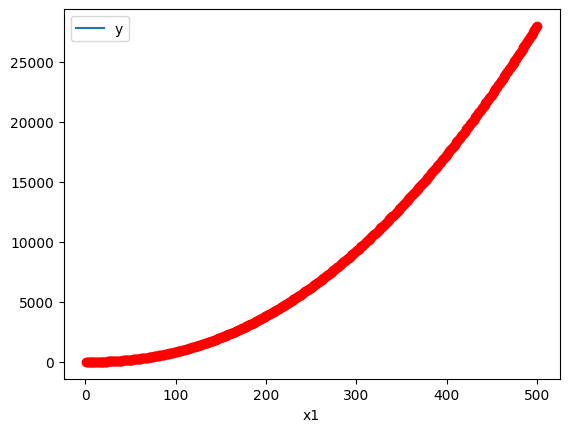

In [33]:
df.plot(x = 'x1', y = 'y', )
plt.plot(df['x1'], df['y'], 'ro' )

<AxesSubplot: xlabel='x2'>

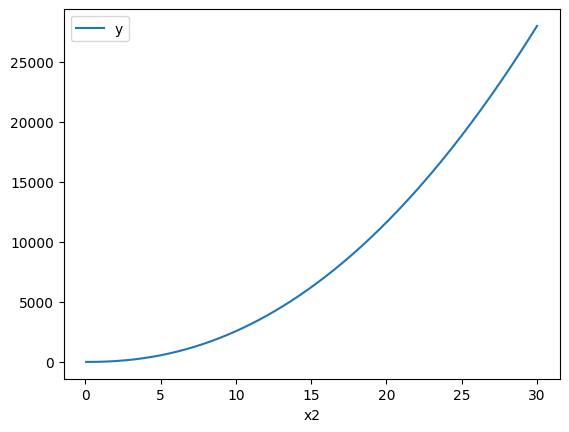

In [34]:
df.plot(x = 'x2', y = 'y')

In [35]:
df.describe()

,x1,x2,y
count,500.000000,500.000000,499.000000
mean,250.000000,15.000000,8849.954153
std,144.771376,8.686283,8323.144680
min,0.000000,0.000000,0.000036
25%,125.000000,7.500000,1376.075306
50%,250.000000,15.000000,6238.826135
75%,375.000000,22.500000,15024.307795
max,500.000000,30.000000,27965.736443


In [36]:
parsed_df = df[df['x1'] < df['x1'].mean()]
parsed_df.to_csv("out_parsed.csv",index=False)

In [37]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [38]:
x1 = np.append(0,np.array(df['x1']).flatten())
x2 = np.append(0,np.array(df['x2']).flatten())

x1,x2 = np.meshgrid(x1,x2) #This is what you were missing

z = 5 * np.log(x1) * np.power(x2, 2)

C:\Users\Ved\AppData\Local\Temp\ipykernel_12216\2603904239.py:6: RuntimeWarning: divide by zero encountered in log
  z = 5 * np.log(x1) * np.power(x2, 2)
C:\Users\Ved\AppData\Local\Temp\ipykernel_12216\2603904239.py:6: RuntimeWarning: invalid value encountered in multiply
  z = 5 * np.log(x1) * np.power(x2, 2)


In [39]:
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_trisurf(x1, x2, z, cmap=cm.jet, linewidth=0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('teste.pdf')
plt.show()

ValueError: x and y must be equal-length 1D arrays, but found shapes (501, 501) and (501, 501)

<Figure size 640x480 with 0 Axes>

In [ ]:
ax.scatter(df['x1'], df['x2'], df['y'])